# Proyecto Data Science "Salarios de los cientificos de datos"

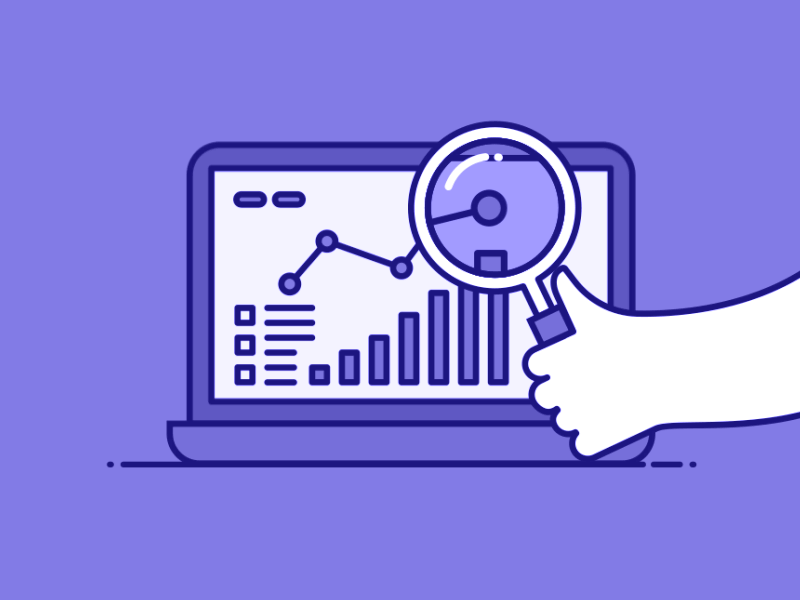

## Abstract

Desde que descubrí el mundo de la ciencia de datos, siempre he tenido una curiosidad insaciable por entender cómo las variables influyen en los resultados. En particular, me he preguntado: ¿Cuáles son las variables que más se correlacionan con el nivel de ingresos de un científico de datos? ¿El tamaño de la empresa tiene algo que ver con el nivel de ingresos?

Para responder a estas preguntas, decidí embarcarme en un proyecto de wrangling de datos. Comencé con un dataframe de salarios de científicos de datos, pero sabía que necesitaba más información para enriquecer mis datos. Así que decidí utilizar una API para obtener datos adicionales.

La API me proporcionó información valiosa sobre las empresas, como su tamaño y su ubicación. Con estos nuevos datos, pude enriquecer mi dataframe original y obtener una visión más completa del panorama.

Una vez que tuve todos los datos que necesitaba, comencé el proceso de wrangling. Limpié los datos, manejé los valores perdidos y outliers, y preparé los datos para el análisis.

Finalmente, llegó el momento de responder a mis hipótesis. Utilicé técnicas estadísticas para identificar las variables que más se correlacionaban con el nivel de ingresos. También analicé si el tamaño de la empresa tenía algún efecto en el nivel de ingresos.

Este proyecto fue un viaje increíblemente enriquecedor. No sólo me permitió responder a mis preguntas, sino que también me dio una visión más profunda del campo de la ciencia de datos. Me hizo darme cuenta de que quiero seguir creciendo y aprendiendo en este campo, y estoy emocionado por lo que vendrá a continuación.

***

Instalo el paquete python-dotenv en el entorno Python actual. Este paquete es útil para manejar archivos .env, que son una forma común y segura de almacenar configuraciones secretas o específicas del entorno (como claves API o contraseñas) para tu aplicación.

In [1]:
!pip install python-dotenv

Estoy utilizando este código para cargar dos claves API desde un archivo .env y almacenarlas en las variables api_key1 y api_key2. Esto es útil porque me permite mantener estas claves API fuera del código fuente, lo cual es una buena práctica para proteger información sensible. Ah si mismo el archivo en el que esta almacenadas las APIKEY esta incluido en un .gitignore.

In [2]:
from dotenv import load_dotenv
import os

load_dotenv()
api_key1 = os.getenv("API_KEY_DI")
api_key2 = os.getenv("API_KEY_BEN")

In [9]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests

# Carga del dataset
dataSet = '../data/jobs_data.csv'
df1 = pd.read_csv(dataSet)

# Resumen general del dataset
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         220 non-null    object 
 1   company_name  220 non-null    object 
 2   location      220 non-null    object 
 3   description   220 non-null    object 
 4   salaries      0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 8.7+ KB
None


Este Dataframe fue obtenido en el trabajo anterior de conexiones con APIs.

In [10]:
df1

,title,company_name,location,description,salaries
0,Data Scientist,"Audible, Inc.","Newark, NJ",Good storytelling starts with great listening....,NaN
1,Data Scientist,Internal Revenue Service,"Huntsville, AL (+36 others)","Click on ""Learn more about this agency"" button...",NaN
2,2024 University Graduate - Data Science Engine...,Adobe,"Biloxi, MS",Our Company\r\n\r\nChanging the world through ...,NaN
3,"Senior Data Scientist, Machine Learning (NLP)",Discord,Anywhere,Discord is looking for experienced and passion...,NaN
4,"Director, Data Science - Retail Media+",The Home Depot,"Atlanta, GA",Position Purpose:\r\n\r\nWe are actively seeki...,NaN
...,...,...,...,...,...
215,"Senior Data Scientist, Product Growth",Jerry,"Detroit, MI",We'd love to hear from you if you like:\r\n• M...,NaN
216,(Intern) Enterprise Analytics Office Data Scie...,Nationwide Insurance and Financial Services,"Hammond, IN",As a team member in the Finance and Internal A...,NaN
217,Staff Data Scientist,MongoDB,"San Francisco, CA",The worldwide data management software market ...,NaN
218,Postdoctoral Scholar,"The University of Chicago, Data Science Institute","Chicago, IL",The Data Science Institute (DSI) at the Univer...,NaN


In [8]:
# Define la URL
url = 'https://serpapi.com/search'

# Lista de todos los estados en los Estados Unidos
estados = ['Nueva York', 'Miami', 'Los Angeles', 'Las Vegas', 'Hawaii', 'Washington DC', 'Boston', 'Orlando', 'San Francisco', 'Chicago', 'Atlanta', 'Filadelfia', 'Seattle', 'Dallas', 'Austin', 'Houston', 'Denver', 'Detroit', 'Minneapolis', 'Phoenix', 'San Diego', 'St. Louis', 'Tampa', 'Baltimore', 'Pittsburgh', 'Portland', 'Charlotte', 'Indianapolis', 'Kansas City', 'New Orleans', 'Cleveland', 'Sacramento', 'Cincinnati', 'Milwaukee', 'Honolulu', 'Salt Lake City', 'Raleigh', 'Nashville', 'Buffalo', 'Richmond','Louisville','Providence','Oklahoma City','Jacksonville','Memphis','Columbus','Las Vegas','Albuquerque','Tucson','Fresno']

# Inicializa una lista vacía para almacenar los datos de los trabajos
jobs_data = []

# Haz una solicitud GET a la API para cada estado
for estado in estados:
    params = {
        'engine': 'google_jobs',
        'q': 'data science',  # Reemplaza esto con el título del trabajo que estás buscando
        'location': estado,  # Cambia la ubicación a cada estado
        'api_key': api_key2 ,  # Esta es la clave de API de SerpApi
        'num': 10  # Solicita 10 resultados por página
    }

    # Haz una solicitud GET a la API
    response = requests.get(url, params=params)

    # Verifica si 'jobs_results' está en la respuesta
    if 'jobs_results' in response.json():
        # Extrae la información relevante de los resultados de la búsqueda
        for job in response.json()['jobs_results']:
            job_info = {
                'title': job.get('title'),
                'company_name': job.get('company_name'),
                'location': job.get('location'),
                'description': job.get('description'),
                # Asegúrate de que el campo 'salaries' exista antes de intentar acceder a él
                'salaries': job.get('salaries') if 'salaries' in job else None,
            }
            jobs_data.append(job_info)
    else:
        print(f"No se encontraron resultados de trabajos para {estado}")

# Crea un DataFrame con los datos
df = pd.DataFrame(jobs_data)

# Guarda el DataFrame como un archivo CSV
df.to_csv('../data/jobs_data2.csv', index=False)    

No se encontraron resultados de trabajos para Nueva York
No se encontraron resultados de trabajos para Filadelfia


In [11]:
df

,title,company_name,location,description,salaries
0,Data Scientist,Internal Revenue Service,"Jacksonville, FL","Click on ""Learn more about this agency"" button...",None
1,Lead Data Scientist,NiSource Careers,"Wesley Chapel, FL",Description\n\nLead Data Scientist...\n\nFull ...,None
2,Senior Data Scientist (Remote Role),InfiCare Staffing,"Orlando, FL","Hi,\n\nI am Saurabh Kumar in the process of id...",None
3,Data Scientist,Summit2Sea Consulting,"Miami, FL",Have you been looking to shift your career int...,None
4,Staff Data Scientist - Inventory Optimization,Chewy,"Plantation, FL",Our Opportunity:\n\nChewy's Supply Chain Team ...,None
...,...,...,...,...,...
475,Senior Data Scientist,Intuit,"Mountain View, CA",Intuit is looking for innovative and hands-on ...,None
476,"Leader, Product Analytics & Data Science",Benchling,"San Francisco, CA",ROLE OVERVIEW\n\nThe Leader of Product Analyti...,None
477,"Principal Scientist, Data Science (JRD)",Johnson & Johnson,"South San Francisco, CA (+6 others)","Janssen Research & Development (“JRD”), a John...",None
478,Staff Data Scientist,MongoDB,"San Francisco, CA",The worldwide data management software market ...,None


In [28]:
# Unir los dataframes
df_unido = pd.concat([df1, df], ignore_index=True)

In [29]:
df_unido

,title,company_name,location,description,salaries
0,Data Scientist,"Audible, Inc.","Newark, NJ",Good storytelling starts with great listening....,NaN
1,Data Scientist,Internal Revenue Service,"Huntsville, AL (+36 others)","Click on ""Learn more about this agency"" button...",NaN
2,2024 University Graduate - Data Science Engine...,Adobe,"Biloxi, MS",Our Company\r\n\r\nChanging the world through ...,NaN
3,"Senior Data Scientist, Machine Learning (NLP)",Discord,Anywhere,Discord is looking for experienced and passion...,NaN
4,"Director, Data Science - Retail Media+",The Home Depot,"Atlanta, GA",Position Purpose:\r\n\r\nWe are actively seeki...,NaN
...,...,...,...,...,...
695,Senior Data Scientist,Intuit,"Mountain View, CA",Intuit is looking for innovative and hands-on ...,None
696,"Leader, Product Analytics & Data Science",Benchling,"San Francisco, CA",ROLE OVERVIEW\n\nThe Leader of Product Analyti...,None
697,"Principal Scientist, Data Science (JRD)",Johnson & Johnson,"South San Francisco, CA (+6 others)","Janssen Research & Development (“JRD”), a John...",None
698,Staff Data Scientist,MongoDB,"San Francisco, CA",The worldwide data management software market ...,None


In [69]:
df_unido.isnull().sum()

title             0
company_name      0
location          0
description       0
salaries        700
dtype: int64

In [71]:
import re

# Define una expresión regular para capturar los salarios
salary_regex = r'\$\d+,\d+ - \$\d+,\d+'

# Crea una nueva columna 'salary' en el DataFrame
df_unido['salary'] = None

for i, row in df_unido.iterrows():
    description = row['description']
    # Busca la expresión regular en la descripción
    match = re.search(salary_regex, description)
    if match:
        # Si se encuentra un salario, guárdalo en el DataFrame
        df_unido.loc[i, 'salary'] = match.group()

In [72]:
df_unido.isnull().sum()

title             0
company_name      0
location          0
description       0
salaries        700
salary          645
dtype: int64

In [51]:
df_uniq = df_unido.drop_duplicates(subset='description').reset_index(drop=True)



In [52]:
df_uniq

,title,company_name,location,description,salaries
0,Data Scientist,"Audible, Inc.","Newark, NJ",Good storytelling starts with great listening....,NaN
1,Data Scientist,Internal Revenue Service,"Huntsville, AL (+36 others)","Click on ""Learn more about this agency"" button...",NaN
2,2024 University Graduate - Data Science Engine...,Adobe,"Biloxi, MS",Our Company\r\n\r\nChanging the world through ...,NaN
3,"Senior Data Scientist, Machine Learning (NLP)",Discord,Anywhere,Discord is looking for experienced and passion...,NaN
4,"Director, Data Science - Retail Media+",The Home Depot,"Atlanta, GA",Position Purpose:\r\n\r\nWe are actively seeki...,NaN
...,...,...,...,...,...
237,Senior Data Scientist,Harvard University,Anywhere,Additional Qualifications and Skills\n• Experi...,None
238,JPC - 805 - Data Science - Woonsocket RI,Flexon Technologies,"Woonsocket, RI",Overview\n\nWe are looking for people with 5-1...,None
239,Data Analytics Co-op,FM Global,"West Greenwich, RI",More information about this job:Overview:\n\nF...,None
240,"VP, Head of Data Science and Systems Biology",Montai Health,"Cambridge, MA","Montai Health is a privately held, early-stage...",None


In [73]:
df_uniq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         480 non-null    object
 1   company_name  480 non-null    object
 2   location      480 non-null    object
 3   description   480 non-null    object
 4   salary        31 non-null     object
dtypes: object(5)
memory usage: 18.9+ KB


In [74]:
df_uniq = df.drop('salaries', axis=1)

In [75]:
import re

# Define una expresión regular para capturar los salarios
salary_regex = r'\$\d+,\d+ - \$\d+,\d+'

# Crea una nueva columna 'salary' en el DataFrame
df_uniq['salary'] = None

for i, row in df_uniq.iterrows():
    description = row['description']
    # Busca la expresión regular en la descripción
    match = re.search(salary_regex, description)
    if match:
        # Si se encuentra un salario, guárdalo en el DataFrame
        df_uniq.loc[i, 'salary'] = match.group()



In [80]:
import re

# Define una expresión regular para capturar los salarios
salary_regex = r'\$\d+,\d+ - \$\d+,\d+'

# Crea una lista para almacenar los salarios extraídos
salarios_extraidos = []

# Iterar sobre las filas del dataframe
for i, row in df_uniq.iterrows():
    description = row['description']
    # Busca la expresión regular en la descripción
    match = re.search(salary_regex, description)
    if match:
        # Si se encuentra un salario, guárdalo
        salarios_extraidos.append(match.group())
    else:
        # Si no se encuentra un salario, asigna None
        salarios_extraidos.append(None)

# Crea una nueva columna 'salary' en el DataFrame con los salarios extraídos
df_uniq['salary'] = salarios_extraidos




In [81]:
df_uniq

,title,company_name,location,description,salary
0,Data Scientist,Internal Revenue Service,"Jacksonville, FL","Click on ""Learn more about this agency"" button...",None
1,Lead Data Scientist,NiSource Careers,"Wesley Chapel, FL",Description\n\nLead Data Scientist...\n\nFull ...,None
2,Senior Data Scientist (Remote Role),InfiCare Staffing,"Orlando, FL","Hi,\n\nI am Saurabh Kumar in the process of id...",None
3,Data Scientist,Summit2Sea Consulting,"Miami, FL",Have you been looking to shift your career int...,None
4,Staff Data Scientist - Inventory Optimization,Chewy,"Plantation, FL",Our Opportunity:\n\nChewy's Supply Chain Team ...,None
...,...,...,...,...,...
475,Senior Data Scientist,Intuit,"Mountain View, CA",Intuit is looking for innovative and hands-on ...,None
476,"Leader, Product Analytics & Data Science",Benchling,"San Francisco, CA",ROLE OVERVIEW\n\nThe Leader of Product Analyti...,None
477,"Principal Scientist, Data Science (JRD)",Johnson & Johnson,"South San Francisco, CA (+6 others)","Janssen Research & Development (“JRD”), a John...",None
478,Staff Data Scientist,MongoDB,"San Francisco, CA",The worldwide data management software market ...,None


In [78]:
df_uniq.isnull().sum()

title             0
company_name      0
location          0
description       0
salary          449
dtype: int64